# Tools for Scientific Python

# scipy

General-purpose scientific toolbox, including signal processing, statistics, optimization, linear algebra, etc.

http://docs.scipy.org/doc/scipy/reference/

In [2]:
import scipy.stats

# probability density at x=2.5 for Gaussian RV with μ=0 and σ=1
scipy.stats.norm.pdf(2.5, 0, 1)

0.01752830049356854

# Matplotlib
Plotting library. Great gallery and example code

http://matplotlib.org

# Pyraf
- Interface between Python and IRAF
- Use Ureka (not Anaconda installation): http://ssb.stsci.edu/ureka/
- Great talk on development of Pyraf by Perry Greenfield: https://www.youtube.com/watch?v=uz53IV1V_Xo

In [ ]:
import pyraf
from pyraf import iraf

iraf.imhead('spectrum.fits[0]', longheader = 'yes')

# statsmodels

Statistical modeling package

http://statsmodels.sourceforge.net/

In [5]:
import numpy as np
import statsmodels.api as sm

# Generate artificial data (2 regressors + constant)
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     9.303
Date:                Fri, 03 Jul 2015   Prob (F-statistic):           0.000201
Time:                        12:53:13   Log-Likelihood:                -24.917
No. Observations:                 100   AIC:                             55.83
Df Residuals:                      97   BIC:                             63.65
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.5522      0.081     19.220      0.000         1.392     1.713
x1             0.0545      0.107      0.509      0.612        -0.158     0.267
x2             0.4451      0.104      4.278      0.000         0.239     0.652
==============================================================================
Omnibus:                       52.704   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.045
Skew:                           0.074   Prob(JB):                       0.0295
Kurtosis:                       1.708   Cond. No.                         5.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## scikit-learn

Machine learning in Python

http://scikit-learn.org/stable/

In [10]:
from sklearn import datasets
from sklearn import svm

# Load digits dataset
digits = datasets.load_digits()

# Create a support vector machine classifier and fit it to the digits data
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])

# Classify one of the digits
print("True digit: " + str(digits.target[-1]))
print("Prediction: " + str(int(clf.predict(digits.data[-1]))))

True digit: 8
Prediction: 8


# sympy

Symbolic math

http://www.sympy.org/en/index.html

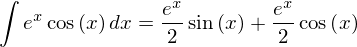

In [33]:
import sympy

# Enable pretty printing
sympy.init_printing()

# Define a variable, x
x = sympy.symbols('x')

# Define an integral over x
a = sympy.Integral(sympy.cos(x) * sympy.exp(x), x)

# Compute the value of the integral
sympy.Eq(a, a.doit())

# scikit-image

Another image processing library, focusing more on computer vision.

http://scikit-image.org/

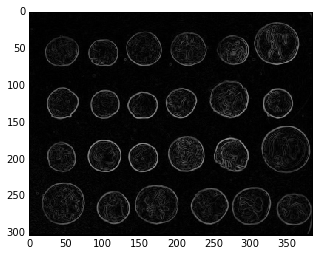

In [18]:
from skimage import data, io, filters

# Load the data (can be any NumPy array)
image = data.coins() 

# Find the edges
edges = filters.sobel(image)

# Display the result
io.imshow(edges)

# numba

Just-In-Time compiler to improve speed and performance of your python programs.

http://numba.pydata.org/

In [ ]:
from numba import jit
from numpy import arange

# jit decorator tells Numba to compile this function.
# The argument types will be inferred by Numba when function is called.
@jit
def sum2d(arr):
    M, N = arr.shape
    result = 0.0
    for i in range(M):
        for j in range(N):
            result += arr[i,j]
    return result

a = arange(9).reshape(3,3)
print(sum2d(a))

# cython

Compile Python programs to C

http://cython.org/

In [24]:
%load_ext Cython

In [26]:
def pyfib(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b        
    return b

In [25]:
%%cython -a

def cfib(int n):
    cdef int a = 0
    cdef int b = 1
    for i in range(n):
        a, b = b, a + b        
    return b

In [27]:
%timeit cfib(100)

The slowest run took 49.17 times longer than the fastest. This could mean that an intermediate result is being cached 
10000000 loops, best of 3: 101 ns per loop


In [29]:
%timeit pyfib(100)

100000 loops, best of 3: 7.98 µs per loop


# astropy

http://www.astropy.org/

Variety of astronomy tools for observers and theorists

#References
* Effective Computation in Physics http://physics.codes

# File Formats

* **CSV**
  * [built in](https://docs.python.org/3/library/csv.html)
* **HDF5**
  * http://www.pytables.org/
  * http://www.h5py.org/
* **NetCDF**
  * http://unidata.github.io/netcdf4-python/
* **JSON**
  * [built in](https://docs.python.org/3/library/json.html)
* **XML**
  * http://lxml.de/
* **GIS** (e.g. GeoJSON)
  * http://toblerity.org/fiona/

# Installing Packages

Most of these packages are included in Anaconda

For those that aren't...

## Conda

http://conda.pydata.org/

Included with Anaconda

Doesn't have everything, but installs binary packages

    conda search package_name
    conda install package_name
    conda uninstall package_name

## Pip

http://pip-installer.org

Standard Python installer

Included with Anaconda

    pip search package_name
    pip install package_name
    pip uninstall package_name